In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import matplotlib.pyplot as pt

In [3]:
df=pd.read_excel('Batting_record_new.xlsx')
df.head(5)

,球団,選手,順位,打率,試合数,打席,打数,得点,安打,二塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,出塁率,長打率,label
0,(日),渡邉 諒,22,0.243802,71,284,242,18,59,11,...,4,3,28,0,7,65,9,0.335714,0.314050,2
1,NaN,西川 遥輝,26,0.232143,65,279,224,33,52,9,...,2,2,48,0,3,52,1,0.371841,0.321429,2
2,(中),木下 拓哉,21,0.265766,72,249,222,20,59,13,...,2,1,23,2,1,38,6,0.336032,0.405405,2
3,NaN,高橋 周平,23,0.259516,79,320,289,26,75,14,...,0,3,28,2,0,47,10,0.321875,0.359862,2
4,(西),源田 壮亮,9,0.290043,61,262,231,34,67,9,...,10,1,18,0,2,39,2,0.345238,0.385281,2


In [4]:
df.isnull().sum()

球団       26
選手        0
順位        0
打率        0
試合数       0
打席        0
打数        0
得点        0
安打        0
二塁打       0
三塁打       0
本塁打       0
塁打        0
打点        0
盗塁        0
盗塁刺       0
犠打        0
犠飛        0
四球        0
故意四       0
死球        0
三振        0
併殺打       0
出塁率       0
長打率       0
label     0
dtype: int64

In [5]:
df.dtypes#データ タイプの確認

球団        object
選手        object
順位         int64
打率       float64
試合数        int64
打席         int64
打数         int64
得点         int64
安打         int64
二塁打        int64
三塁打        int64
本塁打        int64
塁打         int64
打点         int64
盗塁         int64
盗塁刺        int64
犠打         int64
犠飛         int64
四球         int64
故意四        int64
死球         int64
三振         int64
併殺打        int64
出塁率      float64
長打率      float64
label      int64
dtype: object

In [6]:
df.set_index(['球団','選手'],inplace=True)#選手と球団をインデックスに変更
df.head(6)

,,順位,打率,試合数,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,出塁率,長打率,label
球団,選手,,,,,,,,,,,,,,,,,,,,,
(日),渡邉 諒,22,0.243802,71,284,242,18,59,11,0,2,...,4,3,28,0,7,65,9,0.335714,0.314050,2
NaN,西川 遥輝,26,0.232143,65,279,224,33,52,9,1,3,...,2,2,48,0,3,52,1,0.371841,0.321429,2
(中),木下 拓哉,21,0.265766,72,249,222,20,59,13,0,6,...,2,1,23,2,1,38,6,0.336032,0.405405,2
NaN,高橋 周平,23,0.259516,79,320,289,26,75,14,0,5,...,0,3,28,2,0,47,10,0.321875,0.359862,2
(西),源田 壮亮,9,0.290043,61,262,231,34,67,9,5,1,...,10,1,18,0,2,39,2,0.345238,0.385281,2
NaN,呉 念庭,14,0.267176,76,292,262,29,70,13,0,6,...,2,2,23,1,3,45,2,0.331034,0.385496,2


In [7]:
x=scipy.stats.zscore(df)#データの正規化
print(x)

[[ 1.08227025 -1.29520195 -0.588571   ... -0.57991344 -1.62095284
   0.491562  ]
 [ 1.60610882 -1.71791899 -1.55334201 ...  0.46855398 -1.52879617
   0.491562  ]
 [ 0.95131061 -0.49884143 -0.42777583 ... -0.57068151 -0.48000348
   0.491562  ]
 ...
 [-0.22732617  0.15606119  1.18017586 ... -0.38988963  0.10373334
  -0.87963726]
 [-1.66788224  2.35117098  1.18017586 ...  2.16221719  1.44577694
  -0.87963726]
 [-1.14404367  1.1607552  -0.26698066 ...  0.5852482   1.66209301
  -0.87963726]]


In [8]:
df_st=pd.DataFrame(x,columns=df.columns)#データの正規化２
df_st.head()

,順位,打率,試合数,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,出塁率,長打率,label
0,1.082270,-1.295202,-0.588571,-0.535917,-0.764715,-1.862295,-1.256284,-0.742680,-0.961492,-1.098876,...,0.527441,0.595642,-0.156142,-0.867403,1.850112,0.857577,1.096901,-0.579913,-1.620953,0.491562
1,1.606109,-1.717919,-1.553342,-0.682176,-1.356873,-0.308754,-1.832404,-1.211275,-0.222955,-0.942735,...,-0.067333,-0.062046,1.482578,-0.867403,0.067277,0.121748,-1.501345,0.468554,-1.528796,0.491562
2,0.951311,-0.498841,-0.427776,-1.559733,-1.422668,-1.655156,-1.256284,-0.274084,-0.961492,-0.474314,...,-0.067333,-0.719734,-0.565822,0.569233,-0.824141,-0.670683,0.122559,-0.570682,-0.480003,0.491562
3,1.213230,-0.725457,0.697790,0.517151,0.781474,-1.033740,0.060563,-0.039786,-0.961492,-0.630454,...,-0.662107,0.595642,-0.156142,0.569233,-1.269849,-0.161263,1.421682,-0.981555,-1.048803,0.491562
4,-0.620205,0.381397,-2.196523,-1.179458,-1.126589,-0.205185,-0.597861,-1.211275,2.731193,-1.255016,...,2.311763,-0.719734,-0.975502,-0.867403,-0.378432,-0.614081,-1.176564,-0.303515,-0.731334,0.491562


In [9]:
row_clusters=linkage(x,method='ward',metric='euclidean')#word法でクラスターを作成
print(row_clusters)

[[  9.          11.           2.43896791   2.        ]
 [ 47.          50.           2.76232093   2.        ]
 [ 29.          30.           2.98312441   2.        ]
 [  5.          13.           3.00614964   2.        ]
 [  2.          15.           3.0195761    2.        ]
 [  3.          18.           3.16772294   2.        ]
 [ 26.          32.           3.37217369   2.        ]
 [ 10.          58.           3.4064198    3.        ]
 [ 40.          52.           3.50368369   2.        ]
 [ 33.          46.           3.60645671   2.        ]
 [ 20.          23.           3.66401738   2.        ]
 [  6.          57.           3.73250715   3.        ]
 [ 17.          53.           3.83529245   3.        ]
 [ 28.          59.           3.89749465   3.        ]
 [ 27.          48.           3.93186632   2.        ]
 [ 16.          21.           3.9816779    2.        ]
 [ 12.          14.           3.98561977   2.        ]
 [ 35.          42.           4.00724686   2.        ]
 [ 55.    

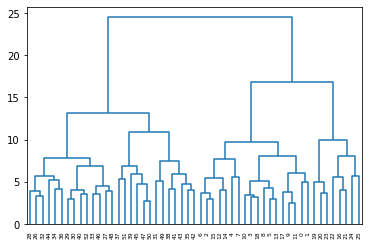

<Figure size 1800x1800 with 0 Axes>

In [10]:
row_dendr=dendrogram(row_clusters,color_threshold=0)#デンドログラムを描画
pt.figure(figsize=(6,6),dpi=300)
pt.show()

In [11]:
labels=fcluster(Z=row_clusters,t=3,criterion='maxclust')#クラスターを三つに分け(labels)描画df
df_tmp=pd.DataFrame(labels,columns=['label'],index=df.index)
df_cluster=pd.concat([df,df_tmp],axis=1)
df_cluster.head(5)

,,順位,打率,試合数,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,犠飛,四球,故意四,死球,三振,併殺打,出塁率,長打率,label,label
球団,選手,,,,,,,,,,,,,,,,,,,,,
(日),渡邉 諒,22,0.243802,71,284,242,18,59,11,0,2,...,3,28,0,7,65,9,0.335714,0.314050,2,2
NaN,西川 遥輝,26,0.232143,65,279,224,33,52,9,1,3,...,2,48,0,3,52,1,0.371841,0.321429,2,2
(中),木下 拓哉,21,0.265766,72,249,222,20,59,13,0,6,...,1,23,2,1,38,6,0.336032,0.405405,2,2
NaN,高橋 周平,23,0.259516,79,320,289,26,75,14,0,5,...,3,28,2,0,47,10,0.321875,0.359862,2,2
(西),源田 壮亮,9,0.290043,61,262,231,34,67,9,5,1,...,1,18,0,2,39,2,0.345238,0.385281,2,2


In [13]:
df_cluster.to_excel('Batting_record_new.xlsx')